### Import Libraries

In [191]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [99]:
%config Completer.use_jedi = False

In [100]:
pd.set_option("max_colwidth", 200)

### Load Dataset 

In [228]:
path = "archive/Mall_Customers.csv"
mall_df = pd.read_csv(path, encoding="utf-8")
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [175]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Analysis 

Female    112
Male       88
Name: Gender, dtype: int64

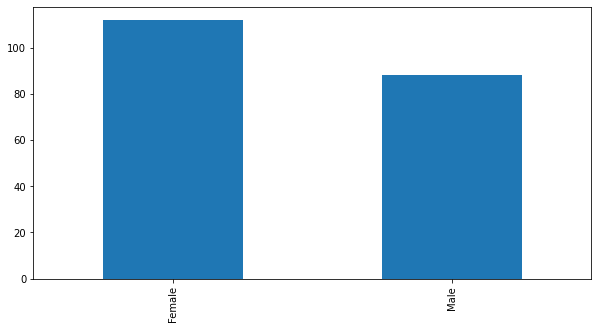

In [176]:
mall_df['Gender'].value_counts().plot(kind='bar', figsize=(10,5))
mall_df['Gender'].value_counts()

In [177]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [229]:
mall_df.drop('CustomerID', axis=1, inplace=True)

In [230]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


*Correlation between all columns excluding gender*

<AxesSubplot:>

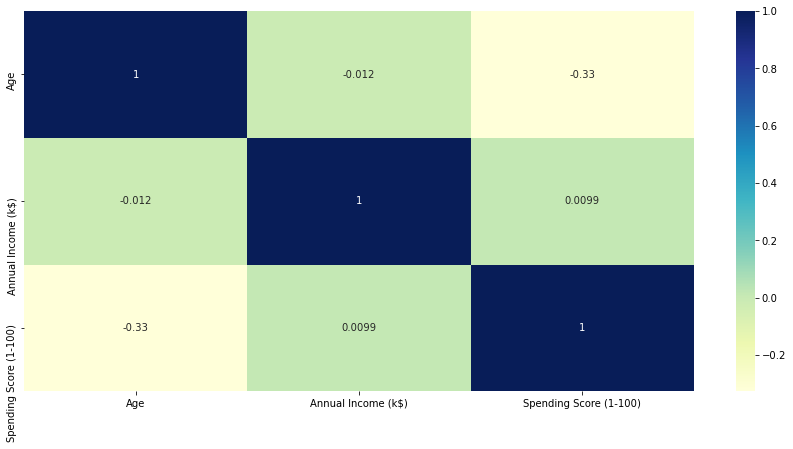

In [180]:
fig = plt.subplots(figsize=(15, 7))
sns.heatmap(mall_df.corr(), cmap='YlGnBu', annot=True)

*Relation between Gender and Age: Not much relation* 

<AxesSubplot:xlabel='Gender', ylabel='Age'>

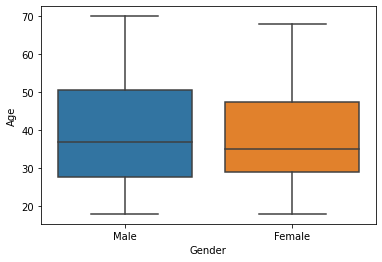

In [181]:
sns.boxplot(x=mall_df['Gender'], y=mall_df['Age'])

*Relation between Gender and Annual income: Not much relation* 

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

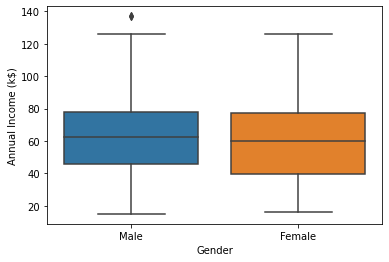

In [182]:
sns.boxplot(x=mall_df['Gender'], y=mall_df['Annual Income (k$)'])

*Relation between Gender and Spending scores: Not much relation*

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

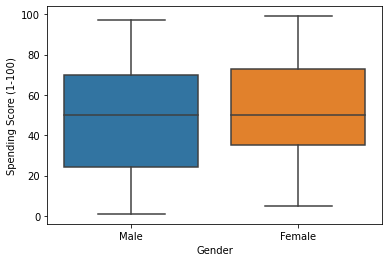

In [183]:
sns.boxplot(x=mall_df['Gender'], y=mall_df['Spending Score (1-100)'])

*Age count w.r.t gender*

<AxesSubplot:xlabel='Age', ylabel='Count'>

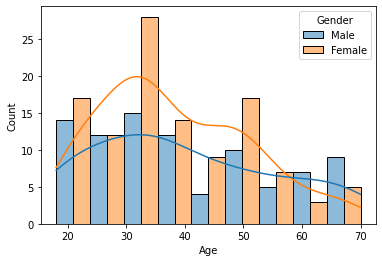

In [184]:
sns.histplot(x=mall_df['Age'], hue=mall_df['Gender'], stat='count', multiple='dodge', kde=True)

*Annual Income count w.r.t gender*

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

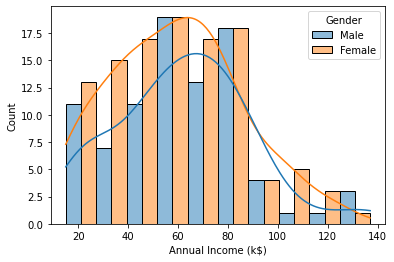

In [185]:
sns.histplot(x=mall_df['Annual Income (k$)'], hue=mall_df['Gender'], stat='count', multiple='dodge', kde=True)

*Spending score w.r.t gender*

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

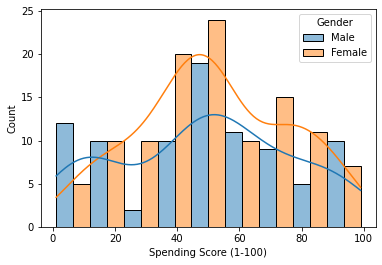

In [186]:
sns.histplot(x=mall_df['Spending Score (1-100)'], hue=mall_df['Gender'], stat='count', multiple='dodge', kde=True)

*Age w.r.t spending score: inversely proportional*

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

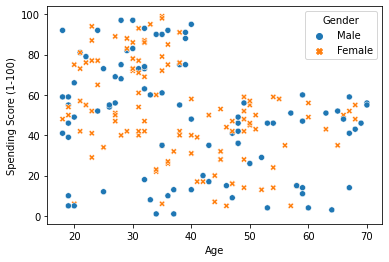

In [187]:
sns.scatterplot(x=mall_df['Age'], y=mall_df['Spending Score (1-100)'], hue=mall_df['Gender'], style=mall_df['Gender'])

*Age w.r.t Annual income*

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

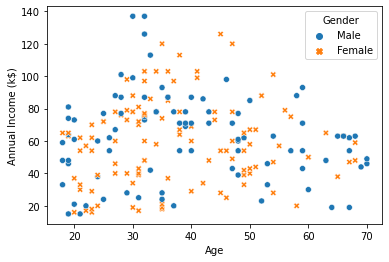

In [188]:
sns.scatterplot(x=mall_df['Age'], y=mall_df['Annual Income (k$)'], hue=mall_df['Gender'], style=mall_df['Gender'])

*Scatterplot for Spending score vs Annual income w.r.t Gender*

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

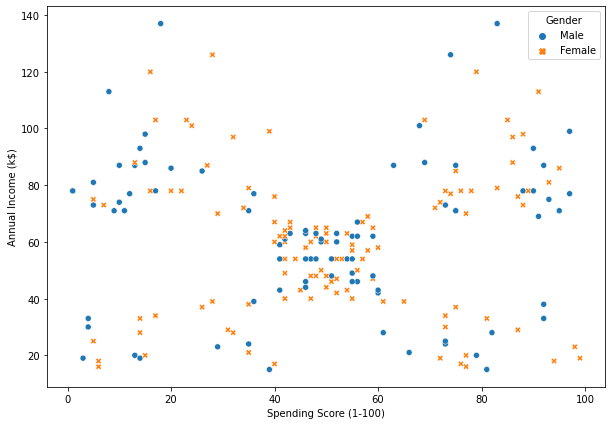

In [189]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=mall_df['Spending Score (1-100)'], y=mall_df['Annual Income (k$)'], hue=mall_df['Gender'], style=mall_df['Gender'])

### Pre-processing 

*Convert categorical feature to numerical using OneHotEncoder*

In [231]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(mall_df[['Gender']]).toarray(), columns=mall_df['Gender'].value_counts().index.to_list())
mall_df = mall_df.drop(['Gender'], axis=1)
mall_df = pd.concat([mall_df, enc_df], axis=1)
mall_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


*Convert categorical feature to numerical using LabelEncoder*

In [202]:
l_enc = LabelEncoder()
mall_df['Gender'] = l_enc.fit_transform(mall_df['Gender'])
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


*Using Standard scaler to bring every feature to normal scale*

In [232]:
ct = ColumnTransformer(
    [('sd', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])],
    remainder = 'passthrough'
)
sc_data = ct.fit_transform(mall_df)
mall_df = pd.DataFrame(sc_data, index=mall_df.index, columns=mall_df.columns)
mall_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


*Apply PCA for dimensionality reduction to process data to KMeans*

In [233]:
pca = PCA(n_components=2)
pc = pca.fit_transform(mall_df)

### K-Means cluster

*Elbow method for k*

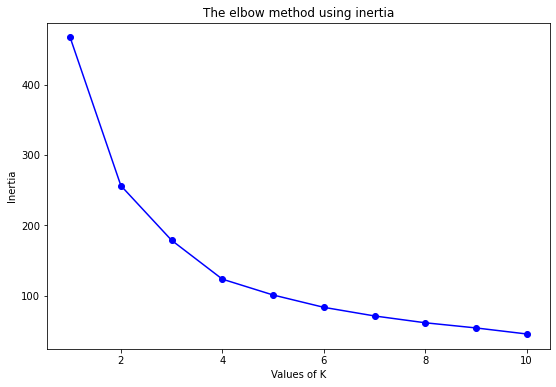

In [234]:
inertia = []
for k in range(1, 11):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-03, random_state=0
    )
    km.fit_predict(pc)
    inertia.append(km.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

In [235]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-03, random_state=0
)
y_km = km.fit_predict(pc)

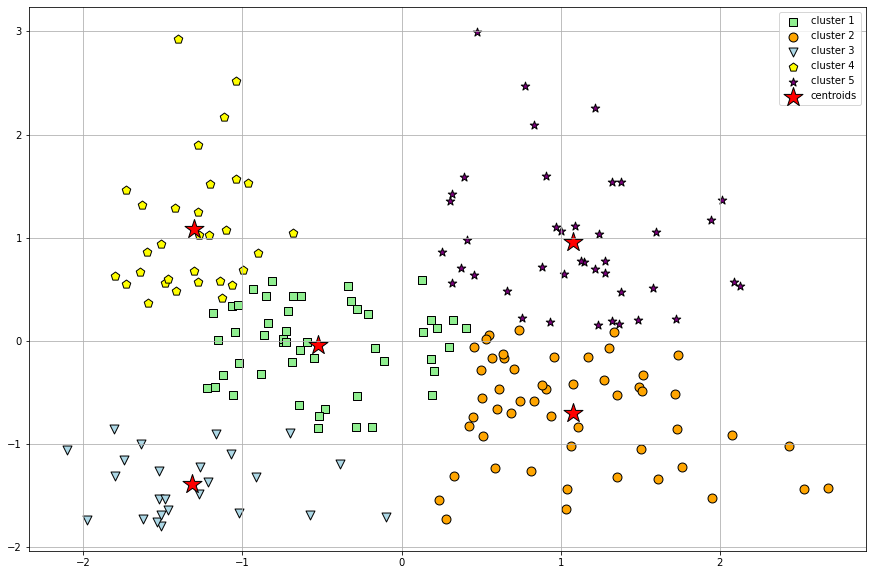

In [237]:
# plot the 3 clusters
plt.figure(figsize=(15,10))
plt.scatter(
    pc[y_km == 0, 0], pc[y_km == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    pc[y_km == 1, 0], pc[y_km == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    pc[y_km == 2, 0], pc[y_km == 2, 1],
    s=80, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    pc[y_km == 3, 0], pc[y_km == 3, 1],
    s=80, c='yellow',
    marker='p', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    pc[y_km == 4, 0], pc[y_km == 4, 1],
    s=80, c='purple',
    marker='*', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=400, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()